<center>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/2954789/5088467/c46f907e6bc947152a53bd043d3ec7af/dataset-cover.jpg?t=2023-03-15-10-40-35" width="300" alt="cognitiveclass.ai logo"  />
</center>

# My First Multiple linear regression lab in machine learning
## It is about video game sales 
##### multiple Linear Regression
####


## Importing Needed package

In [2]:
import numpy as np 
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data in 

In [3]:
df = pd.read_csv("video_games_sales.csv")

df.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#### Let's select some features that we want to use for regression.

In [4]:
cdf = df[["name", "na_sales" , "eu_sales", "jp_sales", "other_sales" , "global_sales"]]
cdf.head()

,name,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37


##
## Select only the first 1000 data

In [5]:
dfx = cdf.iloc[:1000]

##### Let's plot Global Sales sales values with respect to Japon sales:

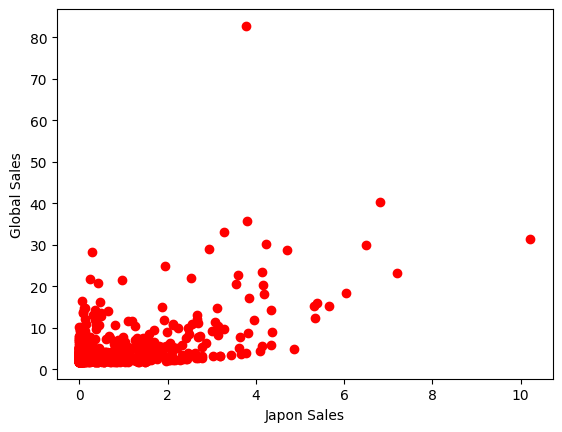

In [6]:
plt.scatter(dfx.jp_sales, dfx.global_sales, color="red")
plt.xlabel("Japon Sales")
plt.ylabel("Global Sales")
plt.show()

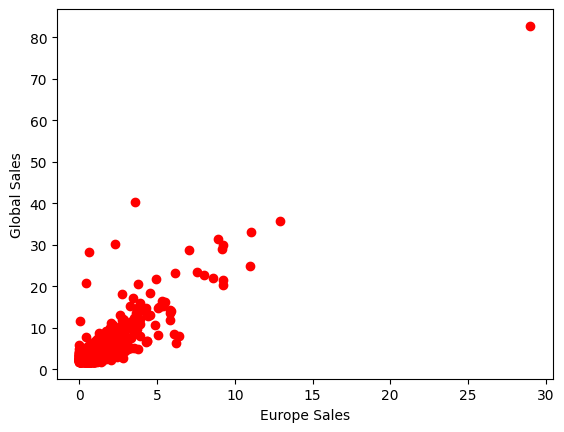

In [7]:
plt.scatter(dfx.eu_sales, dfx.global_sales, color="red")
plt.xlabel("Europe Sales")
plt.ylabel("Global Sales")
plt.show()

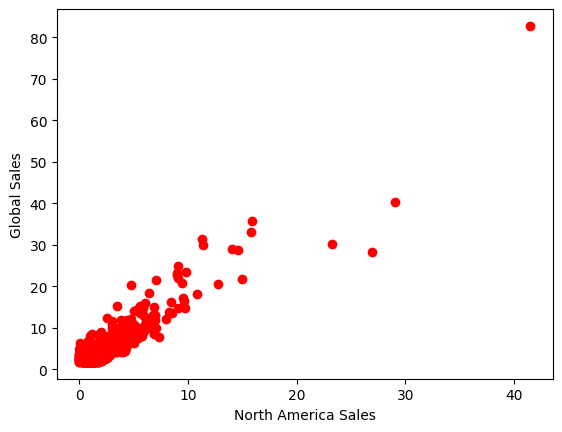

In [8]:
plt.scatter(dfx.na_sales, dfx.global_sales, color="red")
plt.xlabel("North America Sales")
plt.ylabel("Global Sales")
plt.show()

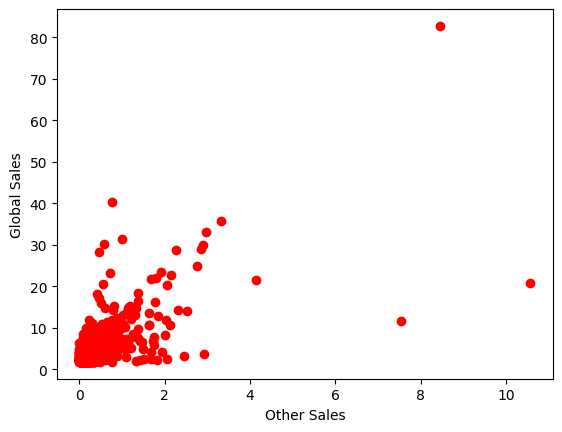

In [9]:
plt.scatter(dfx.other_sales, dfx.global_sales, color="red")
plt.xlabel("Other Sales")
plt.ylabel("Global Sales")
plt.show()

###
## Creating train and test database

In [10]:
msk = np.random.rand(len(dfx)) < 0.8
train = dfx[msk]
test = dfx[~msk]
print(msk)
print(~msk)
print(dfx)
print(train)
print(test)

[ True False  True False False  True  True False  True  True False False
 False False False  True  True  True  True  True  True False  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True False
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True False  True False  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True False False False False  True  True False
  True  True  True  True False  True  True  True False False False  True
 False  True  True  True  True  True  True  True  T

### Train data distribution 

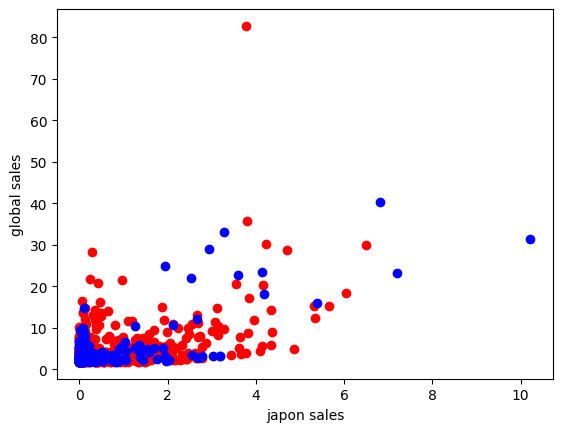

In [11]:
fig = plt.figure()
af1 = fig.add_subplot()
af1.scatter(train.jp_sales, train.global_sales, color = 'red')
af1.scatter(test.jp_sales, test.global_sales, color = 'blue')
plt.xlabel("japon sales")
plt.ylabel("global sales")
plt.show()

####
# Multiple Regression Model

## modeling

In [12]:
from sklearn import linear_model

In [13]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['na_sales', 'eu_sales', 'jp_sales']])
train_y = np.asanyarray(train[['global_sales']])
regr.fit(train_x, train_y)
#the coefficients
print ('coefficients :', regr.coef_)
#the intercept
print ('Intercept :', regr.intercept_)

coefficients : [[1.04992443 1.21662348 0.95887869]]
Intercept : [0.06190563]


## Prediction

In [21]:
from sklearn.metrics import r2_score

In [22]:
test_x = np.asanyarray(test[['na_sales','eu_sales','jp_sales']])
test_y = np.asanyarray(test[['global_sales']])
test_y_ = regr.predict(test_x)
print("Residual sum of squares: %.2f"
      % np.mean((test_y - test_y_) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Residual sum of squares: 0.06
Variance score: 1.00
R2-score: 1.00


###

# Good Luck!!
### My Github : ARSALANnom
### My Linkedin : www.linkedin.com/in/arsalannom

## THE END